In [2]:
import gensim
import gensim.models.keyedvectors as word2vec #need to use due to depreceated model
from gensim.test.utils import datapath
from nltk.tokenize import RegexpTokenizer

from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve,  roc_auc_score, classification_report


In [3]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 5.0 MB/s 
     |████████████████████████████████| 23.9 MB 1.3 MB/s 
     |████████████████████████████████| 965 kB 55.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [4]:
pip install -U bnlp_toolkit

In [5]:
import logging


logging.basicConfig(format='%(asctime)s : %(levelname) s : %(message)s', level=logging.INFO)


In [6]:
np.random.seed(24)

In [7]:
musicData = pd.read_csv('/content/drive/MyDrive/Datasets/BanglaSongLyrics.csv') 
musicData.head()

,title,category,lyrics
0,অপরাজিত,ব্যান্ড,এবার তোমার কথাগুলোর\nকাছে আমি অপরাজিত\nজমে থাক...
1,আমার ভায়ের রক্তে রাঙানো,দেশাত্মবোধক গান,আমার ভায়ের রক্তে রাঙানো একুশে ফেব্রুয়ারি\nআমি ...
2,দয়াল চান্দের পায়ের দুলা আমি যেন হইতে পারি,বাউল,আমি কুকুর হইয়া দেই পাহাড়া\nদয়াল চান্দের ঘড় বাড়...
3,মাওলানা,বাউল,তুমি এসমে আজ যত তরানে ওলা\nগাউছেলাম বাবা নুরে ...
4,আমার আপনার চেয়ে আপন যে জন,নজরুল গীতি,আমার আপনার চেয়ে আপন যে জন\nখুঁজি তারে আমি আপন...


In [8]:
musicData['category'] = musicData['category'].replace({'দেশাত্মবোধক গান' : 1, 'পল্লীগীতি' : 2, 'বাউল' : 3, 'Uncategorized' : 4, 'আধুনিক' : 5, 'ভাওয়াইয়া গান' : 6, 'ভাটিয়ালি' : 7, 'জীবনমুখী গান' : 8, 'নজরুল গীতি' : 9, 'র\u200d্যাপ' : 10, 'ছায়াছবি' : 11, 'ইসলামী গান' : 12, 'ছড়াগান' : 13, 'ভক্তিমূলক গান' : 14, 'নাটক' : 15, 'রবীন্দ্র সংগীত' : 16, 'পপ সঙ্গীত' : 17, 'লালন' : 18, 'বিবিধ' : 19, 'ব্যান্ড' : 20, 'হাসন রাজার গান' : 21})

In [9]:
songs = musicData['lyrics']
labels = musicData['category']

5     1027
16     780
11     762
20     711
9      207
19     127
1       92
3       62
8       58
14      58
17      57
18      46
2       43
15      19
12      13
10      11
21       9
4        8
13       8
7        5
6        2
Name: category, dtype: int64


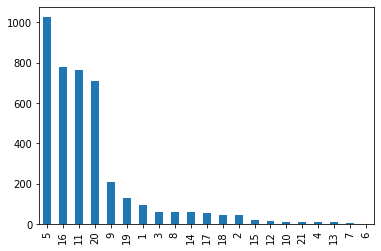

In [10]:
labels_count = labels.value_counts()
labels_count.plot(kind="bar")
print(labels.value_counts())

In [11]:
from bnlp import BasicTokenizer
tkr = BasicTokenizer()

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [12]:
songs_split = []

for i, line in enumerate(songs):
    song = str(line).split()
    song = tkr.tokenize(str(song))
    songs_split.append(song)

In [13]:
print(songs_split[1])

['[', "'", 'আমার', "'", ',', "'", 'ভায়ের', "'", ',', "'", 'রক্তে', "'", ',', "'", 'রাঙানো', "'", ',', "'", 'একুশে', "'", ',', "'", 'ফেব্রুয়ারি', "'", ',', "'", 'আমি', "'", ',', "'", 'কি', "'", ',', "'", 'ভুলিতে', "'", ',', "'", 'পারি', '?', '।', '।', "'", ',', "'", 'ছেলেহারা', "'", ',', "'", 'শত', "'", ',', "'", 'মায়ের', "'", ',', "'", 'অশ্রু', '-', 'গড়া', "'", ',', "'", 'এ', "'", ',', "'", 'ফেব্রুয়ারি', "'", ',', "'", 'আমি', "'", ',', "'", 'কি', "'", ',', "'", 'ভুলিতে', "'", ',', "'", 'পারি', '?', '।', '।', "'", ',', "'", 'আমার', "'", ',', "'", 'সোনার', "'", ',', "'", 'দেশের', "'", ',', "'", 'রক্তে', "'", ',', "'", 'রাঙানো', "'", ',', "'", 'ফেব্রুয়ারি', "'", ',', "'", 'আমি', "'", ',', "'", 'কি', "'", ',', "'", 'ভুলিতে', "'", ',', "'", 'পারি', '?', '।', '।', "'", ']']


In [14]:
w2vModel = word2vec.KeyedVectors.load_word2vec_format(datapath('/content/drive/MyDrive/Models/bangla_word2vec/GoogleNews-vectors-negative300.bin'), binary=True, limit=50000)

2022-04-22 09:39:29,827 : INFO : loading projection weights from /content/drive/MyDrive/Models/bangla_word2vec/GoogleNews-vectors-negative300.bin


KeyboardInterrupt: ignored

In [15]:
w2vModel = word2vec.KeyedVectors.load_word2vec_format(datapath('/content/drive/MyDrive/Models/bangla_word2vec/bnwiki_word2vec.vector'), binary=False, limit=50000)

2022-04-22 09:39:40,886 : INFO : loading projection weights from /content/drive/MyDrive/Models/bangla_word2vec/bnwiki_word2vec.vector
2022-04-22 09:39:47,520 : INFO : loaded (50000, 100) matrix from /content/drive/MyDrive/Models/bangla_word2vec/bnwiki_word2vec.vector


In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(songs_split)
X = tokenizer.texts_to_sequences(songs_split)

In [17]:
maxlensong = 1024
X = pad_sequences(X, maxlen=maxlensong)
print(X.shape)

(4105, 1024)


In [18]:
embedding_layer = Embedding(input_dim=w2vModel.syn0.shape[0], output_dim=w2vModel.syn0.shape[1], weights=[w2vModel.syn0], input_length=X.shape[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [19]:
lstm_out = 128

model = Sequential()
model.add(embedding_layer)
model.add(LSTM(units=lstm_out))
model.add(Dense(1, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1024, 100)         5000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 5,117,377
Trainable params: 5,117,377
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size= 0.1, random_state = 24)

In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs=10, verbose=1, batch_size=batch_size)

Epoch 1/10
116/116 [==============================] - 12s 52ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 2/10
116/116 [==============================] - 6s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 3/10
116/116 [==============================] - 6s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 4/10
116/116 [==============================] - 6s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 5/10
116/116 [==============================] - 6s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 6/10
116/116 [==============================] - 6s 53ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 7/10
116/116 [==============================] - 6s 52ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 8/10
116/116 [==============================] - 6s 52ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 9/10
116/116 [==============================] - 6s 52ms/step - loss: 0.0000e+00 - accuracy: 0.0222
Epoch 10/10
116/116 [==============================] -

In [1]:
score, acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size=batch_size)
y_pred = model.predict(X_test)

NameError: ignored